# Import Libraries

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter

# Downlaod Dataset

In [ ]:
dataset_path = kagglehub.dataset_download("PromptCloudHQ/amazon-reviews-unlocked-mobile-phones")

print(f"Dataset downloaded to: {dataset_path}")

Dataset downloaded to: /root/.cache/kagglehub/datasets/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones/versions/1


In [ ]:
csv_file_path = f"{dataset_path}/Amazon_Unlocked_Mobile.csv"

df = pd.read_csv(csv_file_path)

In [ ]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,5,"I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!",1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,4,"nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,4,It works good but it goes slow sometimes but its a very good phone I love it,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN",Samsung,199.99,4,"Great phone to replace my lost phone. The only thing is the volume up button does not work, but I can still go into settings to adjust. Other than that, it does the job until I am eligible to upgrade my phone again.Thaanks!",0.0


In [ ]:
df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


# Task 1: Write a Python function called sentimentAnalyzer(text). This function takes a text (i.e review) and returns the sentiment

In [ ]:
def sentimentAnalyzer(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity < -0.2:
        return 'Negative'
    elif -0.2 <= polarity <= 0.2:
        return 'Neutral'
    else:
        return 'Positive'

# Task 2: Verify that the function does classify the sentiment correctly by passing the given words

In [ ]:
test_data = {
    "Word": [
        "happy", "exciting", "good", "rich", "smile",
        "sad", "disappointed", "bad", "poor", "anger",
        "food", "animal"
    ],
    "Polarity": [
        0.8, 0.3, 0.7, 0.375, 0.3,
        -0.5, -0.75, -0.699, -0.4, -0.7,
        0, 0
    ],
    "Expected Sentiment": [
        "Positive", "Positive", "Positive", "Positive", "Positive",
        "Negative", "Negative", "Negative", "Negative", "Negative",
        "Neutral", "Neutral"
    ]
}

In [ ]:
test_df = pd.DataFrame(test_data)

test_df['Predicted Sentiment'] = test_df['Word'].apply(sentimentAnalyzer)

In [ ]:
non_matching_test_df = test_df[test_df['Expected Sentiment'] != test_df['Predicted Sentiment']]

In [ ]:
print("Total Rows: ", len(test_df))
print("Matches: ", len(test_df) - len(non_matching_test_df))
print("Nonmatches: ", len(non_matching_test_df))

Total Rows:  12
Matches:  12
Nonmatches:  0


# Task 3: Import the provided dataset into a Pandas DataFrame. Filter the data to only include one product of your choice. The product you select must have at least 1000 reviews. Then, describe the data related to your product. This includes:

*   Product name
*   Number of rows
*   Number of columns
*   Length of the shortest review, length of the longest review, and the average length of the review.

In [ ]:
product_counts = df['Product Name'].value_counts().sort_values(ascending=False)

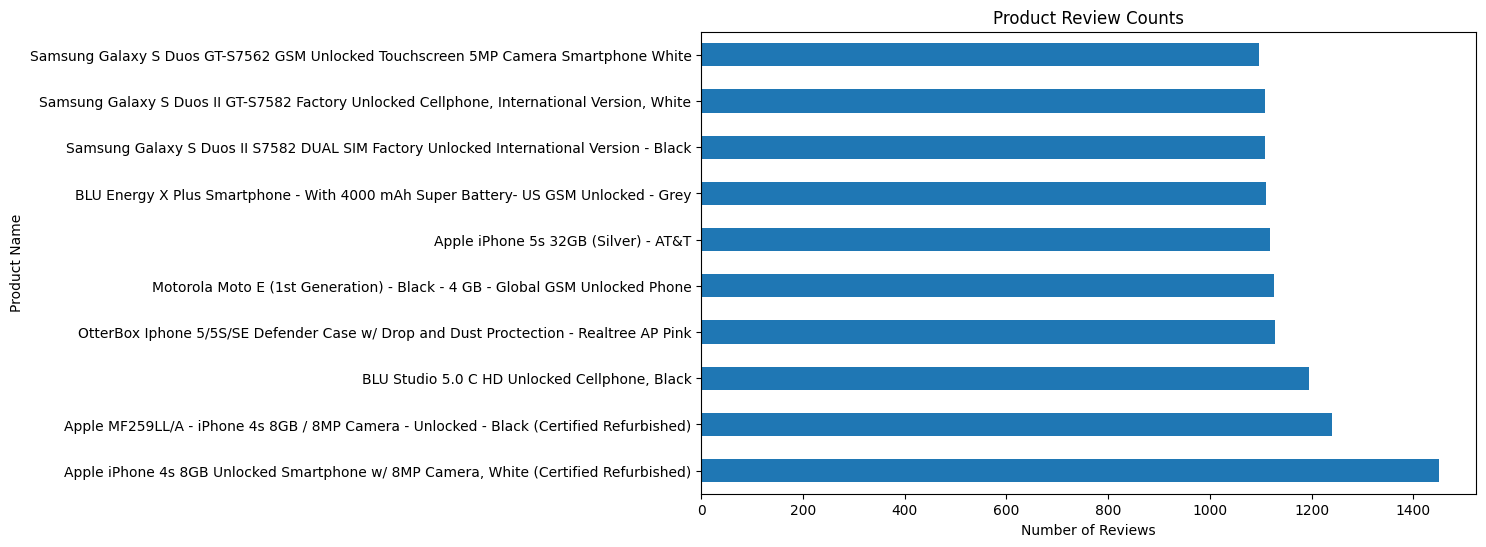

In [ ]:
product_counts.head(10).plot(kind='barh', figsize=(10, 6))
plt.title('Product Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.savefig('product_review_counts.png')
plt.show()

In [ ]:
most_frequent_product = product_counts.index[0]
product_df = df[df['Product Name'] == most_frequent_product].dropna(subset=['Reviews'])

In [ ]:
product_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
16429,"Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)",NaN,99.99,5,good buy,0.0
16430,"Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)",NaN,99.99,5,great phonegood price,0.0
16431,"Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)",NaN,99.99,1,I bought and send to Africa the two are not working,0.0
16432,"Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)",NaN,99.99,4,Had difficulty connecting to wf,0.0
16433,"Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)",NaN,99.99,5,very good,0.0


In [ ]:
print("Product Name:", most_frequent_product)
print("Number of Rows:", len(product_df))
print("Number of Columns:", len(product_df.columns))
print("Length of the shortest review:", product_df['Reviews'].apply(len).min())
print("Length of the longest review:", product_df['Reviews'].apply(len).max())
print("Average length of the review:", product_df['Reviews'].apply(len).mean())

Product Name: Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)
Number of Rows: 1448
Number of Columns: 6
Length of the shortest review: 1
Length of the longest review: 1465
Average length of the review: 107.59668508287292


# Task 4: Apply the function sentimentAnalyzer(text)to the text column in your dataframe. This should create a new column in the dataframe called (Sentiment) which includes the sentiment for each review

In [ ]:
product_df['Sentiment'] = product_df['Reviews'].apply(sentimentAnalyzer)

In [ ]:
product_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
16429,"Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)",NaN,99.99,5,good buy,0.0,Positive
16430,"Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)",NaN,99.99,5,great phonegood price,0.0,Positive
16431,"Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)",NaN,99.99,1,I bought and send to Africa the two are not working,0.0,Neutral
16432,"Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)",NaN,99.99,4,Had difficulty connecting to wf,0.0,Neutral
16433,"Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)",NaN,99.99,5,very good,0.0,Positive


# Task 5: Using visualization and summative statistics (in pandas and matlibplot), describe the results of the sentiment analysis of your product and analyze the results. This should include:


*   Visualizations of the results. For example, a bar chart showing number of
documents with positive, negative, and neutral sentiment. Include any visualization you think is helpful.
*   Examples of reviews with positive, negative, and neural sentiment along with
their polarity.
*   Insights on what your client (producer or seller) need to do to minimize the
negative sentiment and improve their reputation and product.
*   Examples of reviews where you think TextBlob might have assigned the wrong
sentiment to the review. Explain why you think this happened. Note: You may
use the rating column to assess TextBlob’s sentiment.

## Visualizations of the results

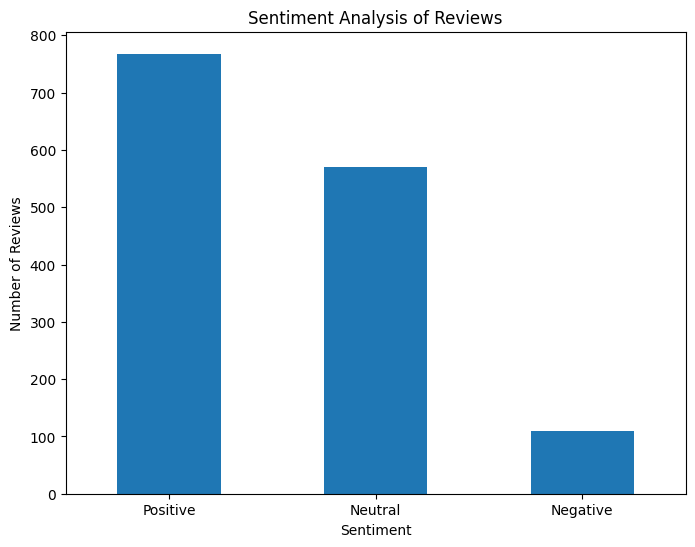

In [ ]:
product_df['Sentiment'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

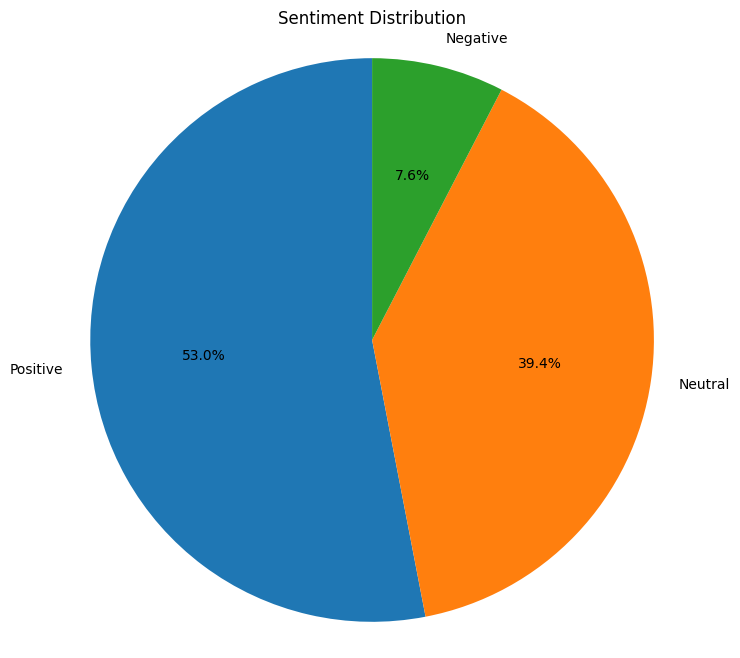

In [ ]:
sentiment_counts = product_df['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

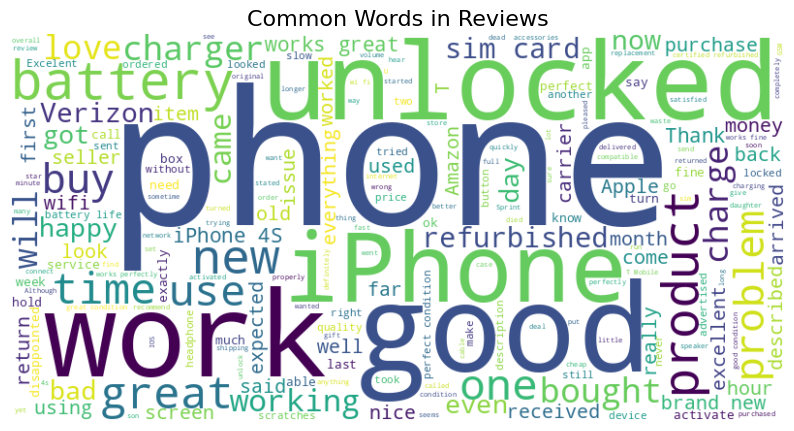

In [ ]:
all_reviews = ' '.join(product_df['Reviews'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Reviews", fontsize=16)
plt.savefig('wordcloud.png')
plt.show()

## Examples of reviews with positive, negative, and neural sentiment along with their polarity.

In [ ]:
pd.set_option('display.max_colwidth', None)

### Positive Sentiment

In [ ]:
positive_reviews = product_df[product_df['Sentiment'] == 'Positive']

In [ ]:
positive_reviews.drop_duplicates(subset='Reviews').head(20)['Reviews']

,Reviews
16429,good buy
16430,great phonegood price
16433,very good
16434,"Excelent product, excellent condition and even better price. I don't miss anything from the 6"
16435,Great product!
16441,"exactly as described, great condition, refurb phone...although it is unlocked the format stops it from being used with all carriers..."
16443,Good
16445,Look's like a new brand iPhone and works perfectly. Just what i was looking for.
16448,Working good..
16449,Works real good


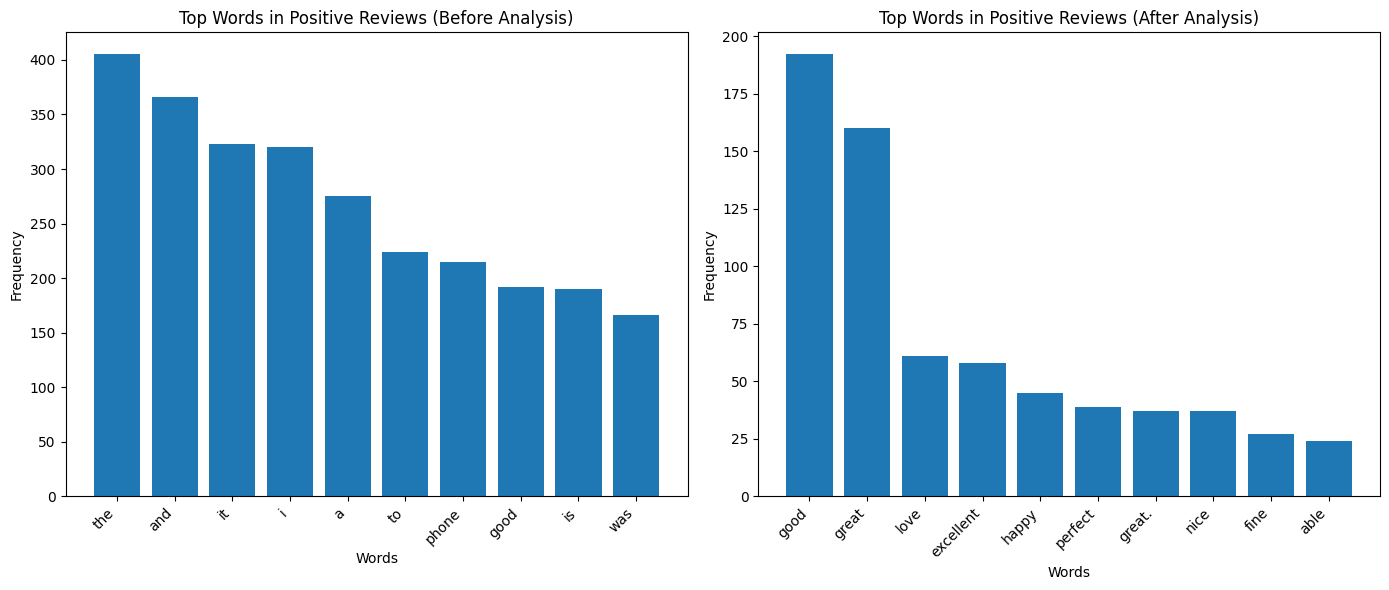

In [ ]:
positive_words = ' '.join(positive_reviews['Reviews']).lower().split()

positive_words_counts = Counter(positive_words)

positive_words_counts_df = pd.DataFrame(positive_words_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
positive_words_counts_df_before = positive_words_counts_df.head(10)  # Before filtering by sentiment
positive_words_counts_df['Sentiment'] = positive_words_counts_df['Word'].apply(sentimentAnalyzer)
positive_words_counts_df_after = positive_words_counts_df[positive_words_counts_df['Sentiment'] == 'Positive'].head(10)  # After filtering

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(positive_words_counts_df_before['Word'], positive_words_counts_df_before['Count'])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Words in Positive Reviews (Before Analysis)")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(positive_words_counts_df_after['Word'], positive_words_counts_df_after['Count'])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Words in Positive Reviews (After Analysis)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Negative Sentiment

In [ ]:
negative_reviews = product_df[product_df['Sentiment'] == 'Negative']

In [ ]:
negative_reviews.drop_duplicates(subset='Reviews').head(20)['Reviews']

,Reviews
16437,Bad batery
16446,The phone stopped working after less than 30 days. I'm in Argentina and it's impossible to ship items from other countries in here. I guess it's a waste of time and money. Extremely dissapointed of my purchase and don't have any plans to shop again here.
16462,I purchased this phone for my son on July 7 and on August 9 the phone conveniently died. It wouldn't charge at all and sits here as a tribute to my stupidity for listening to my teenage son who told me about purchasing a refurbished phone-- I know betterTHIS IS A SCAM! Do not buy this phone!
16513,this is a 3G not a 4G as we thought and we cannot get on the internet out side of wifi very disappointed
16517,The battery life is horrible. I changed it fully before leaving home. Within few hours the battery was close to 10 %. It was hardly used for 10 mins of call. This seems to useless. Hope to return the device.
16519,We receive without all the accessories and the charge doesn`t complete. You are selling a bad product.
16533,There was a problem with the electric connector. It is not appropriate fot the phone.
16539,"Because the body is all score up, I tough that the casing was going to be changed"
16552,This iPhone only works using the speakerphone. It is a rebuilt /unlocked phone. Very disappointing purchase. I will return it as soon as possible.
16560,Llego well but with the default screen calls chokes and reheated too when charging the battery would give me warranty then could not make the claim before because just a week ago I get the product because I am from Venezuela and slow as I can solve this problem?


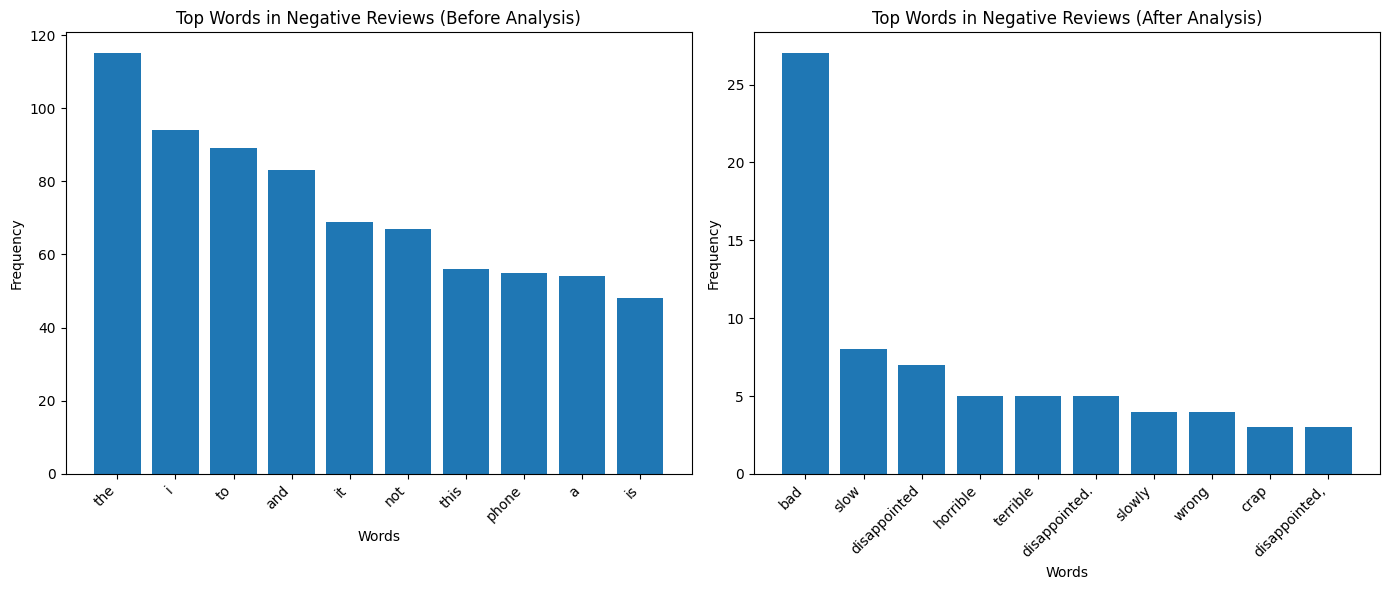

In [ ]:
negative_words = ' '.join(negative_reviews['Reviews']).lower().split()

negative_words_counts = Counter(negative_words)

negative_words_counts_df = pd.DataFrame(negative_words_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
negative_words_counts_df_before = negative_words_counts_df.head(10)  # Before filtering by sentiment
negative_words_counts_df['Sentiment'] = negative_words_counts_df['Word'].apply(sentimentAnalyzer)
negative_words_counts_df_after = negative_words_counts_df[negative_words_counts_df['Sentiment'] == 'Negative'] # After filtering

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(negative_words_counts_df_before['Word'], negative_words_counts_df_before['Count'])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Words in Negative Reviews (Before Analysis)")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(negative_words_counts_df_after.head(10)['Word'], negative_words_counts_df_after.head(10)['Count'])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Words in Negative Reviews (After Analysis)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Neutral Sentiment

In [ ]:
neutral_reviews = product_df[product_df['Sentiment'] == 'Neutral']

In [ ]:
neutral_reviews.drop_duplicates(subset='Reviews').head(20)['Reviews']
neutral_reviews.drop_duplicates(subset='Reviews').head(20)['Reviews'].to_csv('neutral_reviews.csv', index=False)

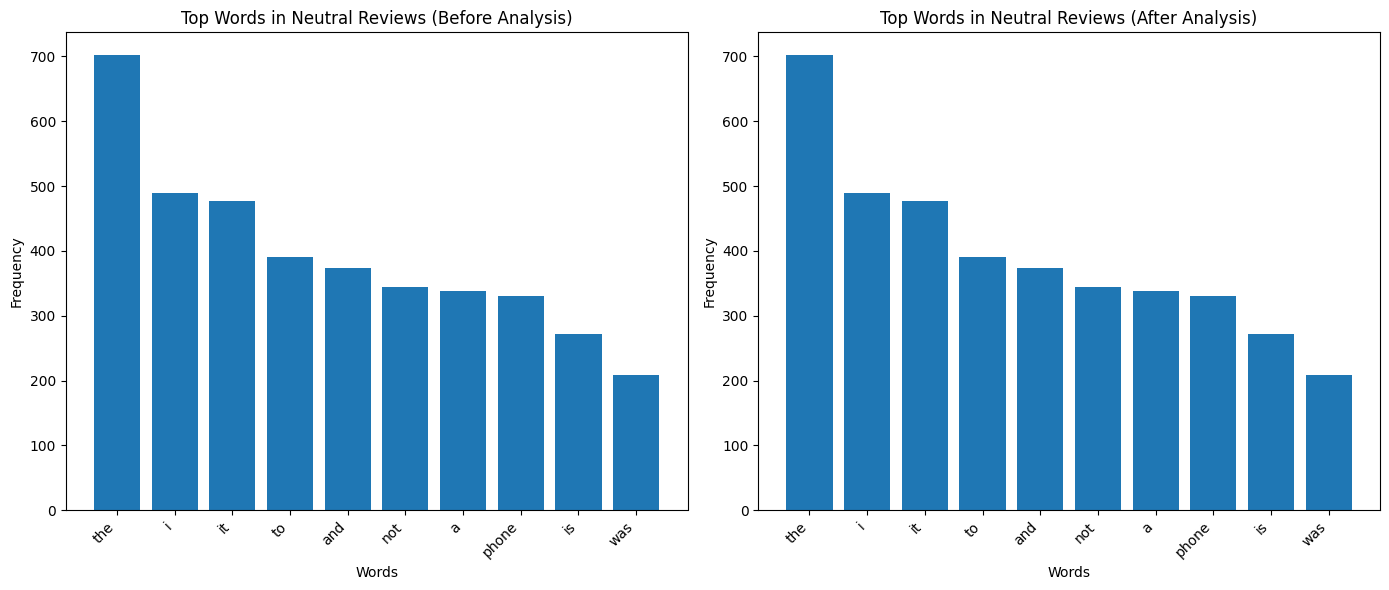

In [ ]:
neutral_words = ' '.join(neutral_reviews['Reviews']).lower().split()

neutral_words_counts = Counter(neutral_words)

neutral_words_counts_df = pd.DataFrame(neutral_words_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
neutral_words_counts_df_before = neutral_words_counts_df.head(10)  # Before filtering by sentiment
neutral_words_counts_df['Sentiment'] = neutral_words_counts_df['Word'].apply(sentimentAnalyzer)
neutral_words_counts_df_after = neutral_words_counts_df[neutral_words_counts_df['Sentiment'] == 'Neutral'].head(10)  # After filtering

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(neutral_words_counts_df_before['Word'], neutral_words_counts_df_before['Count'])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Words in Neutral Reviews (Before Analysis)")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(neutral_words_counts_df_after['Word'], neutral_words_counts_df_after['Count'])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Words in Neutral Reviews (After Analysis)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Insights on what your client (producer or seller) need to do to minimize the negative sentiment and improve their reputation and product.

In [ ]:
negative_words_counts_df_after.head(len(negative_words_counts_df_after))

,Word,Count,Sentiment
0,bad,27,Negative
177,slow,8,Negative
90,disappointed,7,Negative
287,horrible,5,Negative
312,terrible,5,Negative
343,disappointed.,5,Negative
276,slowly,4,Negative
490,wrong,4,Negative
213,crap,3,Negative
263,"disappointed,",3,Negative


In [ ]:
print("Performance Concerns: Words like 'slow,' 'slowly,' 'useless,' and 'poor' suggest dissatisfaction with the device's speed and overall performance.")
print("Product Condition: Words like 'broken,' 'failure,' and 'worst' indicate issues with the reliability and durability of the product, possibly linked to the 'certified refurbished' condition.")
print("Customer Expectations: Words like 'disappointed,' 'horrible,' 'terrible,' and 'negative' imply that the product did not meet customer expectations.")
print("Usability Challenges: Words like 'hard,' 'tough,' and 'impossible' point to user difficulties, potentially in setup, operation, or functionality.")
print("Value for Money: Words like 'expensive,' 'waste,' and 'frustrating' suggest dissatisfaction with the product's price-to-quality ratio.")
print("Emotional Frustration: Words like 'awful,' 'crazy,' and 'sorry' highlight a strong emotional response, often resulting from unmet expectations or product faults.")

Performance Concerns: Words like 'slow,' 'slowly,' 'useless,' and 'poor' suggest dissatisfaction with the device's speed and overall performance.
Product Condition: Words like 'broken,' 'failure,' and 'worst' indicate issues with the reliability and durability of the product, possibly linked to the 'certified refurbished' condition.
Customer Expectations: Words like 'disappointed,' 'horrible,' 'terrible,' and 'negative' imply that the product did not meet customer expectations.
Usability Challenges: Words like 'hard,' 'tough,' and 'impossible' point to user difficulties, potentially in setup, operation, or functionality.
Value for Money: Words like 'expensive,' 'waste,' and 'frustrating' suggest dissatisfaction with the product's price-to-quality ratio.
Emotional Frustration: Words like 'awful,' 'crazy,' and 'sorry' highlight a strong emotional response, often resulting from unmet expectations or product faults.


## Examples of reviews where you think TextBlob might have assigned the wrong sentiment to the review. Explain why you think this happened. Note: You may use the rating column to assess TextBlob’s sentiment.

In [ ]:
misclassified_reviews = product_df[
    ((product_df['Sentiment'] == 'Positive') & (product_df['Rating'] <= 3)) |
    ((product_df['Sentiment'] == 'Negative') & (product_df['Rating'] > 3))
]

In [ ]:
print("Examples of potentially misclassified reviews:")
for index, row in misclassified_reviews.head(10).iterrows():
    print(f"Review: {row['Reviews']}")
    print(f"Predicted Sentiment: {row['Sentiment']}")
    print(f"Rating: {row['Rating']}")
    print("-" * 20)

Examples of potentially misclassified reviews:
Review: Although this did not come with original accessories as stated, knock off charger and no headphones which were include in the original accessories of the iphone 4, the phone seems to work fine for my teenager, the exterior is in excellent shape. Will update when I take it to our carrier.
Predicted Sentiment: Positive
Rating: 3
--------------------
Review: The Battery is not lasting for more than two hours
Predicted Sentiment: Positive
Rating: 1
--------------------
Review: It is not unlocked, i love my virgin mobile iphone and it took a dive the last week so i got this as a replacement because in the details it said it was both gms and cdmc compatible. It is locked into verizon and i now have to spend more money on a prepaid contract that doesnt even work for me which is a big strain on my budget. Cant afford to return and can't wait for a new phone, very dissapointed.
Predicted Sentiment: Positive
Rating: 1
--------------------
Re

In [ ]:
print("\nPossible reasons for misclassification:")
print("- TextBlob's reliance on polarity scores might not always capture nuanced sentiment.")
print("- Sarcasm or irony in reviews can be misinterpreted.")
print("- Certain words or phrases might be context-dependent, leading to inaccurate polarity.")
print("- The threshold of -0.2 and 0.2 used in the sentimentAnalyzer might need adjustment.")


Possible reasons for misclassification:
- TextBlob's reliance on polarity scores might not always capture nuanced sentiment.
- Sarcasm or irony in reviews can be misinterpreted.
- Certain words or phrases might be context-dependent, leading to inaccurate polarity.
- The threshold of -0.2 and 0.2 used in the sentimentAnalyzer might need adjustment.


# Task 6: Export the dataframe to a csv file.

In [ ]:
product_df.to_csv('amazon_product_reviews_sentiment.csv', index=False)